### Hello TensorFlow

In [6]:
import tensorflow as tf

# 构建一个常量
hello = tf.constant('Hello TensorFlow')
# 打开一个Session
with tf.Session() as sess:
    # 使用Session启动Graph
    print sess.run(hello)

Hello TensorFlow


### 加法、乘法

In [7]:
import tensorflow as tf

a = tf.constant(2)
b = tf.constant(3)
with tf.Session() as sess:
    print 'a =', sess.run(a), ', b =', sess.run(b)
    print 'a + b =', sess.run(a + b)
    print 'a * b =', sess.run(a * b)

a = 2 , b = 3
a + b = 5
a * b = 6


### placeholder、feed_dict

In [10]:
import tensorflow as tf

a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

add = tf.add(a, b)
mul = tf.multiply(a, b)

with tf.Session() as sess:
    print 'a + b =', sess.run(add, feed_dict={a: 3, b: 4})
    print 'a * b =', sess.run(mul, feed_dict={a: 3, b: 4})

a + b = 7
a * b = 12


### 线性回归

Epoch: 1 cost= 19.37556 w= -0.7773946 b= 1.4821415
Epoch: 201 cost= 0.11583861 w= 0.13971393 b= 1.5916307
Epoch: 401 cost= 0.113994345 w= 0.1424847 b= 1.5726272
Epoch: 601 cost= 0.11223757 w= 0.14510277 b= 1.5540663
Epoch: 801 cost= 0.11056407 w= 0.147658 b= 1.5359507
Epoch: 1001 cost= 0.10896988 w= 0.15015197 b= 1.5182697
Epoch: 1201 cost= 0.10745127 w= 0.15258612 b= 1.5010128
Epoch: 1401 cost= 0.106004626 w= 0.15496188 b= 1.4841697
Epoch: 1601 cost= 0.10462654 w= 0.15728067 b= 1.4677305
Epoch: 1801 cost= 0.103313774 w= 0.1595438 b= 1.4516859
Epoch: 2001 cost= 0.10206326 w= 0.16175264 b= 1.4360262
Epoch: 2201 cost= 0.10087196 w= 0.16390856 b= 1.4207417
Epoch: 2401 cost= 0.099737175 w= 0.16601275 b= 1.4058241
Epoch: 2601 cost= 0.098656125 w= 0.16806641 b= 1.3912643
Epoch: 2801 cost= 0.09762635 w= 0.17007089 b= 1.3770536
训练结束
Epoch: 3000 cost= 0.096650146 w= 0.17201762 b= 1.3632522


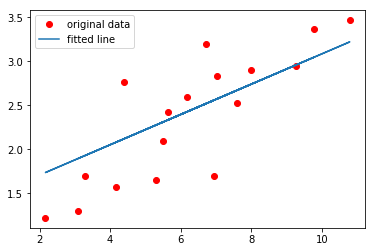

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 超参数
learning_rate = 0.01
training_epochs = 3000
display_step = 200

# 训练集
train_X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])

# 训练集样本数量
n_samples = train_X.shape[0]

# 模型的输入和输出，使用占位符，训练时传入
X = tf.placeholder('float')
Y = tf.placeholder('float')

# 模型的参数（权重、偏差）
w = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

# 定义线性模型
activation = tf.add(tf.multiply(X, w), b)

# 最小化平方误差
cost = tf.reduce_sum(tf.pow(activation - Y, 2)) / (2 * n_samples) # L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 构建初始化全部变量
init = tf.initialize_all_variables()

# 启动图
with tf.Session() as sess:
    sess.run(init)
    
    # 训练模型
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X:train_X, Y:train_Y})

        # 输出阶段训练结果
        if epoch % display_step == 0:
            print "Epoch:", epoch+1, "cost=", sess.run(cost, feed_dict={X:train_X, Y:train_Y}), "w=", sess.run(w), "b=", sess.run(b)

    print '训练结束'
    print "Epoch:", epoch+1, "cost=", sess.run(cost, feed_dict={X:train_X, Y:train_Y}), "w=", sess.run(w), "b=", sess.run(b)

    plt.plot(train_X, train_Y, 'ro', label='original data')
    plt.plot(train_X, sess.run(w) * train_X + sess.run(b), label='fitted line')
    plt.legend()
    plt.show()